### Heart Disease data set from Kaggle: https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

# You will need to unzip pima-indians-diabetes-database.zip for this code to work

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Heart-Disease-data-set-from-Kaggle:-https://www.kaggle.com/uciml/pima-indians-diabetes-database/data" data-toc-modified-id="Heart-Disease-data-set-from-Kaggle:-https://www.kaggle.com/uciml/pima-indians-diabetes-database/data-0.0.1"><span class="toc-item-num">0.0.1&nbsp;&nbsp;</span>Heart Disease data set from Kaggle: <a href="https://www.kaggle.com/uciml/pima-indians-diabetes-database/data" target="_blank">https://www.kaggle.com/uciml/pima-indians-diabetes-database/data</a></a></span></li></ul></li></ul></li><li><span><a href="#You-will-need-to-unzip-pima-indians-diabetes-database.zip-for-this-code-to-work" data-toc-modified-id="You-will-need-to-unzip-pima-indians-diabetes-database.zip-for-this-code-to-work-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>You will need to unzip pima-indians-diabetes-database.zip for this code to work</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#The-model:" data-toc-modified-id="The-model:-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>The model:</a></span></li><li><span><a href="#Log-likelihood-of-the-data-(b/c-X-is-assumed-iid):" data-toc-modified-id="Log-likelihood-of-the-data-(b/c-X-is-assumed-iid):-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Log-likelihood of the data (b/c X is assumed iid):</a></span></li><li><span><a href="#So-maximizing-this-w/-respect-to-each-parameter-gives-us-the-maximum-likelihood-estimates-for-that-parameter.-We-can-do-so-by-(unsurprisingly)-taking-the-partial-derivative-w/-respect-to-each-parameter,-set-it-equal-to-0,-and-solve-the-equation.-Reference:-http://web.engr.oregonstate.edu/~xfern/classes/cs534/notes/LDA.pdf" data-toc-modified-id="So-maximizing-this-w/-respect-to-each-parameter-gives-us-the-maximum-likelihood-estimates-for-that-parameter.-We-can-do-so-by-(unsurprisingly)-taking-the-partial-derivative-w/-respect-to-each-parameter,-set-it-equal-to-0,-and-solve-the-equation.-Reference:-http://web.engr.oregonstate.edu/~xfern/classes/cs534/notes/LDA.pdf-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>So maximizing this w/ respect to each parameter gives us the maximum likelihood estimates for that parameter. We can do so by (unsurprisingly) taking the partial derivative w/ respect to each parameter, set it equal to 0, and solve the equation. Reference: <a href="http://web.engr.oregonstate.edu/~xfern/classes/cs534/notes/LDA.pdf" target="_blank">http://web.engr.oregonstate.edu/~xfern/classes/cs534/notes/LDA.pdf</a></a></span></li><li><span><a href="#Using-these-parameter-estimates,-we-can-model-$p(y\mid-x)$,-the-posterior-distribution,-using-Bayes's-rule:" data-toc-modified-id="Using-these-parameter-estimates,-we-can-model-$p(y\mid-x)$,-the-posterior-distribution,-using-Bayes's-rule:-1.0.4"><span class="toc-item-num">1.0.4&nbsp;&nbsp;</span>Using these parameter estimates, we can model $p(y\mid x)$, the posterior distribution, using Bayes's rule:</a></span></li><li><span><a href="#Since-are-classification-strategy-will-involve-choosing-the-class-that-is-most-probable,-we-do-not-need-to-calculate-the-denominator-of-Bayes's-rule-because-it-is-independent-of-y" data-toc-modified-id="Since-are-classification-strategy-will-involve-choosing-the-class-that-is-most-probable,-we-do-not-need-to-calculate-the-denominator-of-Bayes's-rule-because-it-is-independent-of-y-1.0.5"><span class="toc-item-num">1.0.5&nbsp;&nbsp;</span>Since are classification strategy will involve choosing the class that is most probable, we do not need to calculate the denominator of Bayes's rule because it is independent of y</a></span></li><li><span><a href="#However-it-is-good-to-know-that-the-denominator-is-given-by:" data-toc-modified-id="However-it-is-good-to-know-that-the-denominator-is-given-by:-1.0.6"><span class="toc-item-num">1.0.6&nbsp;&nbsp;</span>However it is good to know that the denominator is given by:</a></span></li><li><span><a href="#Finally,-the-other-(actually-imporant)-quantities-in-Bayes's-rule-are-given-by-our-model-(i.e.-we-assumed-X-is-distributed-Gaussian-and-Y-is-Bernoulli)" data-toc-modified-id="Finally,-the-other-(actually-imporant)-quantities-in-Bayes's-rule-are-given-by-our-model-(i.e.-we-assumed-X-is-distributed-Gaussian-and-Y-is-Bernoulli)-1.0.7"><span class="toc-item-num">1.0.7&nbsp;&nbsp;</span>Finally, the other (actually imporant) quantities in Bayes's rule are given by our model (i.e. we assumed X is distributed Gaussian and Y is Bernoulli)</a></span></li><li><span><a href="#So-let's-implement-this-:)" data-toc-modified-id="So-let's-implement-this-:)-1.0.8"><span class="toc-item-num">1.0.8&nbsp;&nbsp;</span>So let's implement this :)</a></span></li><li><span><a href="#Maximum-likelihood-estimates-for-each-parameter:" data-toc-modified-id="Maximum-likelihood-estimates-for-each-parameter:-1.0.9"><span class="toc-item-num">1.0.9&nbsp;&nbsp;</span>Maximum likelihood estimates for each parameter:</a></span></li><li><span><a href="#Checking-that-we-got-all-the-parameters-correct" data-toc-modified-id="Checking-that-we-got-all-the-parameters-correct-1.0.10"><span class="toc-item-num">1.0.10&nbsp;&nbsp;</span>Checking that we got all the parameters correct</a></span></li><li><span><a href="#Although-the-covariance-matrices-are-supposedly-different-(I-say-supposedly-different-b/c-upon-visual-inspection-there-is-no-noticeable-difference).-I-also-get-the-same-predictions-as-scikit-learn" data-toc-modified-id="Although-the-covariance-matrices-are-supposedly-different-(I-say-supposedly-different-b/c-upon-visual-inspection-there-is-no-noticeable-difference).-I-also-get-the-same-predictions-as-scikit-learn-1.0.11"><span class="toc-item-num">1.0.11&nbsp;&nbsp;</span>Although the covariance matrices are supposedly different (I say supposedly different b/c upon visual inspection there is no noticeable difference). I also get the same predictions as scikit-learn</a></span></li><li><span><a href="#Let's-plot-the-decision-boundary-between-the-classes-for-both-scikit-learn-and-from-scratch-LDA" data-toc-modified-id="Let's-plot-the-decision-boundary-between-the-classes-for-both-scikit-learn-and-from-scratch-LDA-1.0.12"><span class="toc-item-num">1.0.12&nbsp;&nbsp;</span>Let's plot the decision boundary between the classes for both scikit-learn and from scratch LDA</a></span></li></ul></li></ul></li></ul></div>

### The model:

$$ y \sim Bernoulli(\phi)$$
$$ x \mid y = 0 \sim \mathcal{N}(\mu_0, \Sigma)$$
$$ x \mid y = 1 \sim \mathcal{N}(\mu_1, \Sigma)$$
<br>
Notice that each Gaussian has the same covariance matrix $\Sigma$. This is an additional simplifying homoscedasticity assumption of GDA (which is the same as LDA). This differs from Quadratic Discriminant Analysis which does not use this assumptions, implying that there is different covariance matrices for each Gaussian. See https://en.wikipedia.org/wiki/Linear_discriminant_analysis#LDA_for_two_classes

### Log-likelihood of the data (b/c X is assumed iid):

$$ \mathcal{L}(\phi, \mu_0, \mu_1, \Sigma) = \log\prod_{i=1}^m p(x^{(i)} \mid y^{(i)}; \mu_0, \mu_1, \Sigma)p(y^{(i)};\phi) $$

### So maximizing this w/ respect to each parameter gives us the maximum likelihood estimates for that parameter. We can do so by (unsurprisingly) taking the partial derivative w/ respect to each parameter, set it equal to 0, and solve the equation. Reference: http://web.engr.oregonstate.edu/~xfern/classes/cs534/notes/LDA.pdf

### Using these parameter estimates, we can model $p(y\mid x)$, the posterior distribution, using Bayes's rule:

$$ p(y \mid x) = \frac{p(x \mid y)p(y)}{p(x)} $$

### Since are classification strategy will involve choosing the class that is most probable, we do not need to calculate the denominator of Bayes's rule because it is independent of y
$$
\begin{align*}
  \underset{y}{\mathrm{argmax}}p(y \mid x) &= \underset{y}{\mathrm{argmax}} \frac{p(x \mid y) p(y)}{p(x)} \\
 &= \underset{y}{\mathrm{argmax}}p(x \mid y)p(y)
\end{align*}
$$

### However it is good to know that the denominator is given by:

$$ p(x) = \sum_{k=1}^{C} p(x \mid y = k)p(y = k) $$
, where $C$ is the number of classes. The quantities in the summation are given by our model. 

### Finally, the other (actually imporant) quantities in Bayes's rule are given by our model (i.e. we assumed X is distributed Gaussian and Y is Bernoulli)

$$ p(y) = \phi^y(1 - \phi)^{(1-y)} $$
<br>
$$ p(x \mid y = k) = \dfrac{1}{(2\pi)^{n/2} \mid \Sigma \mid^{1/2}} \exp\Big(-\frac12 (x-\mu_k)^T \Sigma^{-1}(x -
\mu_k)\Big)$$
<br>
Note that $k \in \{0,1\} $ because $Y$ is a binary variable in our specific problem.

### So let's implement this :)

### Maximum likelihood estimates for each parameter:

$$ \phi = \frac{1}{m} \sum_{i=1}^m 1\{y^{(i)} = 1\} $$
This is just the fraction of positive class examples (for example, the number of emails that are spam).
$$ \mu_0 = \frac{\sum_{i=1}^m 1\{y^{(i)} = 0\}x^{(i)}}{\sum_{i=1}^m 1\{y^{(i)} = 0\}} $$ 
<br>
$$ \mu_1 = \frac{\sum_{i=1}^m 1\{y^{(i)} = 1\}x^{(i)}}{\sum_{i=1}^m 1\{y^{(i)} = 1\}} $$ 
or more generally,
$$ \mu_k = \frac{\sum_{i=1}^m 1\{y^{(i)} = k\}x^{(i)}}{\sum_{i=1}^m 1\{y^{(i)} = k\}} $$ 
, for non-binary classification problems. Essentially, each of these formulas are saying to sum each example $x^{(i)}$ (which may be a vector) with class $y^{(i)} = k$ and average it over all examples with $y^{(i)} = k$.
$$ \Sigma = \frac{1}{m} \sum_{i=1}^m (x^{(i)} - \mu_{y^{(i)}})(x^{(i)} - \mu_{y^{(i)}})^{T}$$ 
This is the covariance matrix for the multivariate gaussian, which is a generalization of the variance of a real-valued random variable.

In [37]:
import sklearn as sk, sklearn.model_selection
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

diabetes = pd.read_csv('diabetes.csv')
Y = diabetes['Outcome']
X = diabetes[['BloodPressure', 'Glucose']]#diabetes.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, Y, 
                                    test_size=0.33, 
                                    random_state=42)

In [38]:
class LDA():
    
    def __init(self):
        pass
    
    def fit(self, X_train, y_train):
        '''
            Fits a Gaussian to each class in y_train using the training data
            X_train: array-like, shape = (n_examples, n_features)
            y_train: array-like, shape = (n_examples, ), training labels 
        '''
        if isinstance(X_train, pd.DataFrame):
            X_train = X_train.values
        elif isinstance(X_train, list):
            X_train = np.array(X_train)
            
        if isinstance(y_train, pd.Series):
            y_train = y_train.values
        elif isinstance(y_train, list):
            y_train = np.array(y_train)

        # Computes the priors of the posterior distribution
        self.phi = self._compute_phi(y_train)
        # Computes the means of the gaussians fit to each classes data
        self.mu = self._compute_mu(X_train, y_train)
        # Computes the shared covariance matrix fit to each classes data
        self.covariance = self._compute_covariance(X_train, y_train)
        self.classes = np.unique(y_train)
        return self
        
    def predict_bayes(self, X_test):
        '''
            Predicts the class that each example of X_test belongs to 
            X_test: array-like, shape = (n_examples, n_features)
        '''
        if isinstance(X_test, pd.DataFrame):
            X_test = X_test.values
        X_test = np.atleast_2d(X_test)
        
        # Compute argmax{c_k} p(x | c_k) * p(c_k) / [sum(p(x | c_k) * p(c_k)) over classes]
        predictions = []
        for c in self.classes:
            Xp = self.compute_bayes(c, X_test)
            predictions.append(Xp)
        
        max_class_indices = np.argmax(np.array(predictions).T, axis=1)
        # map indices back to the classes 
        return np.array([self.classes[i] for i in max_class_indices])
        
            
    def compute_bayes(self, c, X):
        '''
            Computes the numerator of Bayes's rule
            c: the class to compute the conditional probability density with
            X: the set of instances to classify, array-like, shape = (n_examples, n_features)
        '''
        # No need to compute denominator b/c it is not dependent on the class
        return self._class_conditional_p(c, X) * self.phi[c]
    
    def predict_proba(self, X_test):
        '''
            Computes the probability of each example of the in X_test
            of belonging to each class 
            X_test: array-like, shape = (n_examples, n_features)
        '''
        if isinstance(X_test, pd.DataFrame):
            X_test = X_test.values
        X_test = np.atleast_2d(X_test)
        
        # Compute argmax{c_k} p(x | c_k) * p(c_k) / [sum(p(x | c_k) * p(c_k)) over classes]
        predictions = []
        norm = self._compute_normalization(X_test)
        for c in self.classes:
            Xp = self.compute_bayes(c, X_test) / norm
            predictions.append(Xp)
        
        return np.array(predictions).T
    
    def _compute_normalization(self, X):
        '''
            Computes the normalization factor in denominator of Bayes's rule
            X: array-like, shape = (n_examples, n_features)
        '''
        return np.sum([self.compute_bayes(c, X) for c in self.classes], axis=0)
    
    # This is the left term in the numerator of Bayes's rule 
    # i.e. the likelihood of the data
    def _class_conditional_p(self, c_k, X):
        '''
            Computes the class conditional probability p(x | c_k)
            i.e. the mulitvariate gaussian equation with shared covariance
            matrix and mu_k
            c_k: the class to compute the probability from
            X: list of instances to compute the likelihood 
        '''
        # constant term of gaussian density
        # the dimension of the gaussians
        d = len(self.covariance)
        pi_constant = (2 * np.pi) ** (1/d)
        covariance_constant = \
            np.linalg.det(self.covariance) ** (0.5)            
        constant =  1.0 / pi_constant * covariance_constant
        
        # upper part of exponent 
        left = -0.5 * (X - self.mu[c_k]).T
        middle = np.linalg.inv(self.covariance)
        right = (X - self.mu[c_k])   
        
        preds = []
        for i in range(len(X)):
            preds.append(left[:, i].dot(middle).dot(right[i, :]))
            
        exponent = np.exp(preds) # shape = (n_examples, ) 
        
        return constant * exponent
    
    def print_params(self):
        #if self.phi == None or self.covariance  == None or self.mu == None:
            #raise ValueError('You must fit the model first')
        print('phi', self.phi)
        print('mu', self.mu)
        print('covariance matrix', self.covariance)
    
    def _compute_mu(self, X_train, y_train):
        '''
        Computes the average feature vector for every class
        X_train: 
            2d np array where rows are examples and columns are features,
            all of which should be quantitative
        y_train: 
            1d np array representing labels in [0, 1]
        '''
        classes = np.unique(y_train)
        mu = {}
        for c in classes:
            mu[c] = (y_train == c).dot(X_train) / np.float64(np.sum(y_train == c))
        return mu
    
    def _compute_phi(self, y_train):
        '''
        Computes the proportion of "success" valued examples
        y_train: 
            1d np array representing labels in [0, 1]
        '''
        num_examples = len(y_train)
        classes = np.unique(y_train)
        phi = {}
        for j in classes:
            phi[j] = np.sum(y_train == j) / np.float64(num_examples)
        return phi
    
    def _compute_covariance(self, X_train, y_train):
        '''
        Computes the shared covariance matrix of the Gaussians fit to the data
        i.e. it computes the pooled within-class covariance matrix used for each Gaussian
        X_train: 
            2d np array where rows are examples and columns are features,
            all of which should be quantitative
        y_train: 
            1d np array representing labels in [0, 1]
        '''
        num_examples = len(y_train)
        classes = np.unique(y_train)
        covs = []
        for group in classes:
            Xg = X_train[y_train == group, :]
            from sklearn import covariance
            covs.append(np.atleast_2d(self._cov(Xg)))
        return np.average(covs, axis=0, weights=list(self.phi.values()))
    
    def _cov(self, X):
        '''
            Computes the covariance matrix of X, used to compute 
            covariance of instances in a class
            X: array-like, shape = (n_samples, n_features)
            Returns:
                Covariance matrix of X, shape = (n_features, n_features)
        '''
        n_samples = X.shape[0]
        X = X.T
        avg = np.average(X, axis=1)
        X = X.astype(np.float64)
        X -= avg[:, np.newaxis]
        return np.dot(X, X.T) / np.float64(n_samples)

### Checking that we got all the parameters correct

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
sklearn_lda = LinearDiscriminantAnalysis(store_covariance=True)
sklearn_lda.fit(X_train, y_train)

from_scratch_lda = LDA()
from_scratch_lda.fit(X_train,y_train)

print('Means estimated correctly:', np.array_equal(list(from_scratch_lda.mu.values()), 
                                                   sklearn_lda.means_))
print('Priors estimated correctly:', np.array_equal(list(from_scratch_lda.phi.values()), 
                                                    sklearn_lda.priors_))
print('Covariance matrix estimated correctly:', np.array_equal(from_scratch_lda.covariance, 
                                                               sklearn_lda.covariance_))

('Means estimated correctly:', True)
('Priors estimated correctly:', True)
('Covariance matrix estimated correctly:', False)


### Although the covariance matrices are supposedly different (I say supposedly different b/c upon visual inspection there is no noticeable difference). I also get the same predictions as scikit-learn

In [40]:
from sklearn.metrics import accuracy_score

sklearn_predictions = sklearn_lda.predict(X_test)
from_scratch_predictions = from_scratch_lda.predict_bayes(X_test)
print('scikit-learn lda accuracy', accuracy_score(y_test, sklearn_predictions))
print('from scratch lda accuracy', accuracy_score(y_test, from_scratch_predictions))

('scikit-learn lda accuracy', 0.7362204724409449)
('from scratch lda accuracy', 0.7362204724409449)


### Let's plot the decision boundary between the classes for both scikit-learn and from scratch LDA

In [41]:
from scipy import linalg
import numpy as np
import matplotlib as mpl
from matplotlib import colors

# Colormap
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

# Plot functions
# The means from the LDA model
def plot_data(lda, means, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title('Linear Discriminant Analysis')
        plt.ylabel('Data with\n fixed covariance')
    elif fig_index == 2:
        plt.title('Quadratic Discriminant Analysis')
    elif fig_index == 3:
        plt.ylabel('Data with\n varying covariances')

    # Gives array w/ True = correct classification
    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    alpha = 0.5

    # class 0: dots
    plt.plot(X0_tp[:, 0], X0_tp[:, 1], 'o', alpha=alpha,
             color='red', markeredgecolor='k')
    plt.plot(X0_fp[:, 0], X0_fp[:, 1], '*', alpha=alpha,
             color='#990000', markeredgecolor='k')  # dark red

    # class 1: dots
    plt.plot(X1_tp[:, 0], X1_tp[:, 1], 'o', alpha=alpha,
             color='blue', markeredgecolor='k')
    plt.plot(X1_fp[:, 0], X1_fp[:, 1], '*', alpha=alpha,
             color='#000099', markeredgecolor='k')  # dark blue

    # class 0 and 1 : areas
    # We want to make predictions at every point in the plane 
    # so as to color the decision regions
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    # a grid of each point in the plane (obvs not technically, there are infinite # of points)
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    # make a prediction for each point in the plane
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    # xx, yy represent the points to plot the color at
    # Z is mapped onto the color palette, norm causes color mapping
    # in the range specified 
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.))
    
    # Plot a contour of Z at xx, yy at the .5 level
    # See: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contour.html
    CS = plt.contour(xx, yy, Z, [.5], linewidths=1., colors='k')
    plt.clabel(CS, fontsize=10)

    # means: the mean of each feature value for each Gaussian
    # first gaussian: mean of 0th and 1th feature
    plt.plot(means[0][0], means[0][1],
             'o', color='black', markersize=10, markeredgecolor='k')
    # second gaussian: mean of 0th and 1th feature
    plt.plot(means[1][0], means[1][1],
             'o', color='black', markersize=10, markeredgecolor='k')

    return splot

# Plots the covariance ellipses 
def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, facecolor=color,
                              edgecolor='yellow',
                              linewidth=2, zorder=2)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())

# The means and covariance from the model 
def plot_lda_cov(means, covariance, splot):
    plot_ellipse(splot, means[0], covariance, 'red')
    plot_ellipse(splot, means[1], covariance, 'blue')

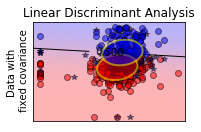

In [42]:
# Linear Discriminant Analysis via Sklearn
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_pred = lda.fit(X_train, y_train).predict(X_train)
splot = plot_data(lda, lda.means_, X_train.values, y_train.values, y_pred, fig_index=1)
plot_lda_cov(lda.means_, lda.covariance_, splot)
plt.axis('tight')
plt.show()

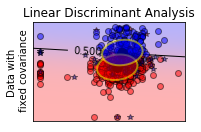

In [43]:
# Linear Discriminant Analysis from scratch
lda_from_scratch = LDA()
y_pred = lda_from_scratch.fit(X_train, y_train).predict_bayes(X_train)
splot = plot_data(lda_from_scratch, lda_from_scratch.mu, X_train.values, y_train.values, y_pred, fig_index=1)
plot_lda_cov(lda_from_scratch.mu, lda_from_scratch.covariance, splot)
plt.axis('tight')
plt.show()